In [3]:
from scipy.stats import ttest_1samp
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')






In [4]:

df = pd.read_csv("C:/Users/kokse/Downloads/результаты А_B - cookie_cats 2.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [6]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


### Видим очень сильный выброс по количеству попыток в 49854 раз

In [23]:

# Удаляем выброс
df = df[df.sum_gamerounds < 3000]

In [24]:

df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018800e+04,90188.000000,90188.000000,90188.000000
mean,4.998397e+06,51.320253,0.445214,0.186056
std,2.883298e+06,102.682719,0.496992,0.389154
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512211e+06,5.000000,0.000000,0.000000
50%,4.995804e+06,16.000000,0.000000,0.000000
75%,7.496461e+06,51.000000,1.000000,0.000000
max,9.999861e+06,2961.000000,1.000000,1.000000


### Мы видим,  что был один игрок с очень большим количеством попыток, который мог испортить все результаты эксперимента

In [27]:
# Смотрим размеры выборок
# Сравним версии gate_30 и gate_40.
A = df.version.groupby(df.version == 'gate_30').count()
B = df.version.groupby(df.version == 'gate_40').count()
print(A)
print(B)

version
False    45489
True     44699
Name: version, dtype: int64
version
False    44699
True     45489
Name: version, dtype: int64


#### Количество игроков примерно одинаково

In [30]:

from scipy.stats import ttest_ind
from scipy.stats import kstest

In [29]:
ttest_ind(df[df.version == 'gate_30'].sum_gamerounds,
          df[df.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.0633675766982082, pvalue=0.9494739458256001)

In [31]:

print(kstest(df['sum_gamerounds'][df.version == 'gate_30'], 'norm'))
print(kstest(df['sum_gamerounds'][df.version == 'gate_40'], 'norm'))

KstestResult(statistic=0.8724153079945488, pvalue=0.0)
KstestResult(statistic=0.8707186187388001, pvalue=0.0)


Распределение не нормальное

Text(0.5, 1.0, 'Number of game rounds players on the first week')

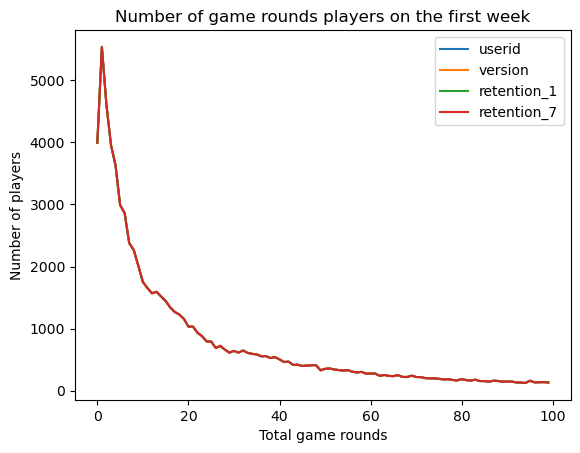

In [34]:
# Найдем сколько пользователь играет
# Для наглядной визуализации будем использовать, только тех кто играл от 1 до 100 раз
plot_df = df.groupby('sum_gamerounds').count()

ax = plot_df[:100].plot()
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
ax.set_title('Number of game rounds players on the first week')

In [35]:
# Чтобы получить более детальное представление
# о низкой и высокой активности пользователей изменим наше распределение выборок.

plt.style.use('ggplot')

Group_A = df[df.version == 'gate_30']
print(Group_A.head())

Group_B = df[df.version == 'gate_40']
print(Group_B.head())

bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500]
plot_GA = pd.DataFrame(Group_A.groupby(pd.cut(Group_A['sum_gamerounds'],
                                              bins=bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B['sum_gamerounds'],
                                              bins=bins)).count())

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3            0            0
1      337  gate_30              38            1            0
6     1066  gate_30               0            0            0
11    2101  gate_30               0            0            0
13    2179  gate_30              39            1            0
   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165            1            0
3     483  gate_40               1            0            0
4     488  gate_40             179            1            1
5     540  gate_40             187            1            1
7    1444  gate_40               2            0            0


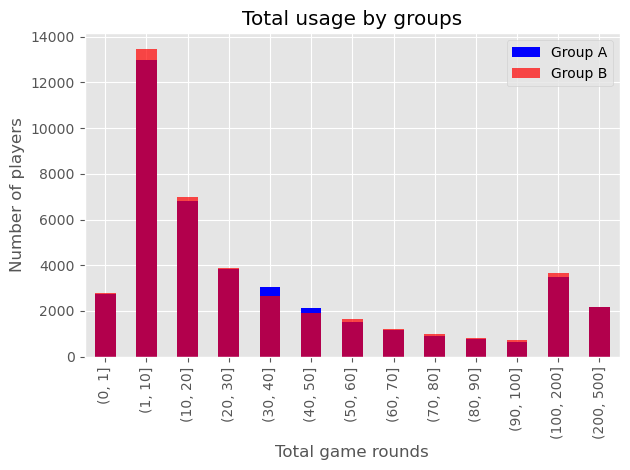

In [36]:
# Построим соответствующий график

ax = plot_GA.plot(kind = 'bar', y='userid', color = 'blue', alpha = 1,
                  title = 'Total usage by groups')
plot_GB.plot(kind = 'bar', y = 'userid', ax = ax, color = 'red', alpha = 0.7)
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
plt.legend(['Group A', 'Group B'])
plt.tight_layout()
plt.grid(True)

На графике видно, что между версиями нет значительной разницы, только небольшие различия на 30-40 раундах

In [37]:
# Посмотрим какое удержание на 1 день всего.

oneday = df.retention_1.sum()/df.retention_1.count()
print(str(oneday*100)+'%')

44.521444094558035%


In [38]:
# Посмотрим какое удержание на 1 день для групп
oneday = df.retention_1.groupby(df.version).sum()/df.retention_1.groupby(df.version).count()
print(oneday*100)

version
gate_30    44.819795
gate_40    44.228275
Name: retention_1, dtype: float64


### Обе версии имеют практически одинаковые результаты.
### Четково ответа стоит ли применять изменение мы не получили.

In [39]:
# Для принятия решения воспользуемся Bootstrapp
boot_1d = []
for i in range(500):
  boot_mean = df.retention_1.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
print(boot_1d)
     

version       gate_30   gate_40
retention_1  0.447724  0.439992
retention_1  0.447770  0.439817
retention_1  0.445505  0.442575
retention_1  0.442927  0.442824
retention_1  0.446735  0.440316
...               ...       ...
retention_1  0.444454  0.445434
retention_1  0.450761  0.443034
retention_1  0.445235  0.441136
retention_1  0.446582  0.445625
retention_1  0.449878  0.442620

[500 rows x 2 columns]


Text(0.5, 0, 'Среднее время удержания в течение 1 дня')

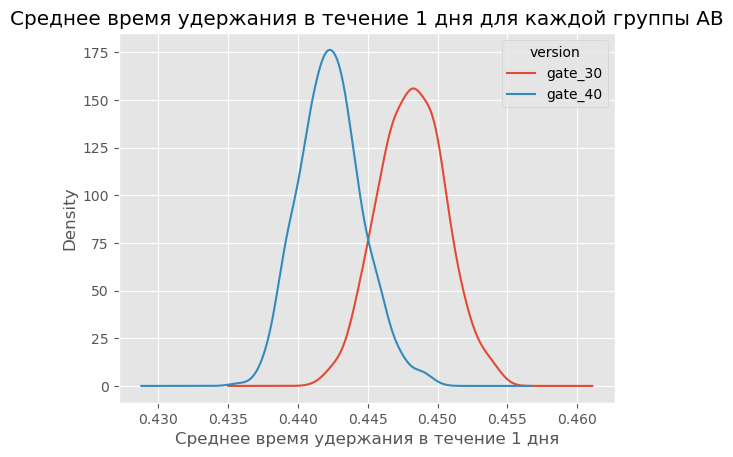

In [41]:
ax = boot_1d.plot.kde()
ax.set_title('Среднее время удержания в течение 1 дня для каждой группы AB')
ax.set_xlabel('Среднее время удержания в течение 1 дня')

Увеличим разницу в удержании в течение 1 дня.

Text(0.5, 1.0, 'Разница в % при масштабировании')

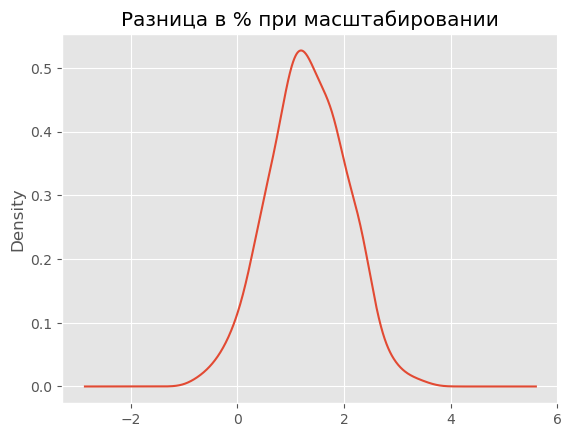

In [42]:

boot_1d['difference'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']*100

ax = boot_1d['difference'].plot.kde()
ax.set_title('Разница в % при масштабировании')
     

Из графика видно, что наиболее вероятная разница 1-2% в пользу ворот на 30 уровне.

Посчитаем в скольки процентах случаев разница больше 0.

In [43]:
prob = (boot_1d['difference'] > 0).sum() / len(boot_1d['difference'])
print(str(prob*100)+'%')
     

96.39999999999999%


### Вывод:
#### Существует высокая вероятность того, что удержание в течении 1 дня лучше,
#### когда ворота находятся на уровне 30.

#### Дальше расчитае удержание в течении 7 дней для двух AB групп.

In [44]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

#### Для более точного расчета воспользуемся bootstrap-анализом.

In [45]:
boot_7d = []
for i in range(500):
  boot_mean = df.retention_7.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())

boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

version       gate_30   gate_40
retention_7  0.187717  0.184083
retention_7  0.191993  0.179520
retention_7  0.189030  0.181089
retention_7  0.190169  0.180970
retention_7  0.192182  0.183022


1.0


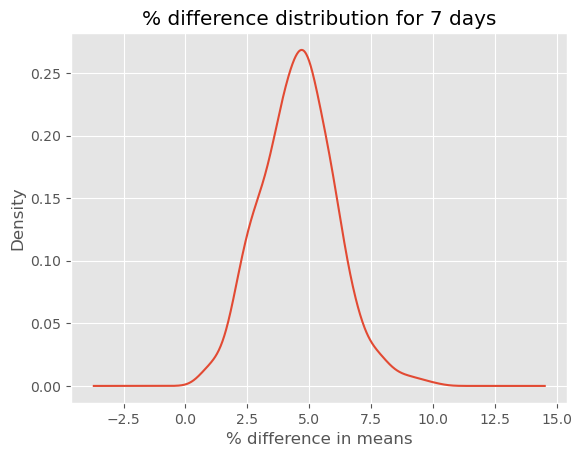

In [46]:
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel('% difference in means')
ax.set_title('% difference distribution for 7 days')

prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

print(prob)

In [47]:

prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(str(prob*100)+'%')

100.0%


### Вывод:
#### Наши иследования показали, что удержание в течении 7 дней выше, когда ворота ноходятся на уровне 30.
#### Следовательно для удержания аудитории не рекомендуется перемещать ворота с 30 уровня на 40.


### Итог:
#### Оставляем текущую версию